IMPORTANTE: Arquivo data_tp1 no mesmo diretório.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

# Iniciando o gerador de números aleatório do Numpy.
np.random.seed(10)
TRAINING_EPOCHS = 50
N_INPUT = 784
N_CLASSES = 10

In [15]:
# Lendo os dados do arquivo 'data_tp1' disponibilizados pelo professor.
# A função np_utils.to_categorical transforma o inteiro em um vetor de
# 0s com o número 1 na posição do inteiro.
read_data = pd.read_csv('data_tp1', header=None, dtype=float)
images = read_data.iloc[:, 1:].as_matrix()
labels = np_utils.to_categorical(read_data.iloc[:, 0].as_matrix(), N_CLASSES)

In [16]:
# Função que cria o modelo e treina, retornando os valores de acurácia e de perda,
# tanto empíricos quanto de validação.
def model(n_hidden, batch_size, learning_rate):
    # Criação do modelo com camadas densamente conectadas.
    model = Sequential()
    
    # Primeira camada com função sigmoidal de ativação. Por ser a primeira camada,
    # a documentação do Keras intrui usar o parâmetro input_shape com o tamanho
    # da entrada, que nesse caso é 784. Esta camada tem N_INPUT unidades.
    model.add(Dense(N_INPUT, input_shape=(N_INPUT,), activation='sigmoid'))
    # Camada oculta com n_hidden unidades e função sigmoidal de ativação.
    model.add(Dense(n_hidden, activation='sigmoid'))
    # Camada oculta com N_CLASSES (10) unidades e função softmax de ativação,
    # que retorna a saída com as probabilidades das classes.
    model.add(Dense(N_CLASSES, activation='softmax'))

    # Para uma classificação como a do MNIST, onde a saída é um vetor de probabilidades de tamanho 10,
    # a documentação do Keras instrui usar 'categorical_crossentropy' para se utilizar a função de cross-entropy
    # como função de perda.
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate), metrics=['accuracy'])
    logger = model.fit(images, labels,
                       batch_size=batch_size,  # Tamanho do batch
                       epochs=TRAINING_EPOCHS, # Quantidade de épocas
                       validation_split=0.2,   # Cross Validation com K = 5
                       verbose=1)              # Faz o Keras logar o progresso do treino
    
    return pd.DataFrame(logger.history)

In [17]:
def plot_history(history):
    plt.figure(figsize=(10, 6)) # Tamanho da figura do gráfico
    axes = plt.gca()
    axes.set_xlim([0, TRAINING_EPOCHS]) # Limites do eixo X
    axes.set_ylim([0, 1]) # Limites do eixo Y
    (1 - history['acc']).plot(label='Inline label')
    (1 - history['val_acc']).plot(linestyle='--')
    plt.ylabel('Erro Empírico e de Validação')
    plt.xlabel('Épocas')

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 103us/step - loss: 2.4462 - acc: 0.1095 - val_loss: 9.8476 - val_acc: 0.0920
Epoch 2/50
4000/4000 [==============================] - 0s 57us/step - loss: 9.8551 - acc: 0.1020 - val_loss: 10.9154 - val_acc: 0.1210
Epoch 3/50
4000/4000 [==============================] - 0s 56us/step - loss: 11.4803 - acc: 0.1125 - val_loss: 11.2299 - val_acc: 0.1290
Epoch 4/50
4000/4000 [==============================] - 0s 65us/step - loss: 11.8127 - acc: 0.0978 - val_loss: 14.1405 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 0s 87us/step - loss: 14.2807 - acc: 0.0960 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/50
4000/4000 [==============================] - 0s 57us/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/50
4000/4000 [==============================] - 0s 55us/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.

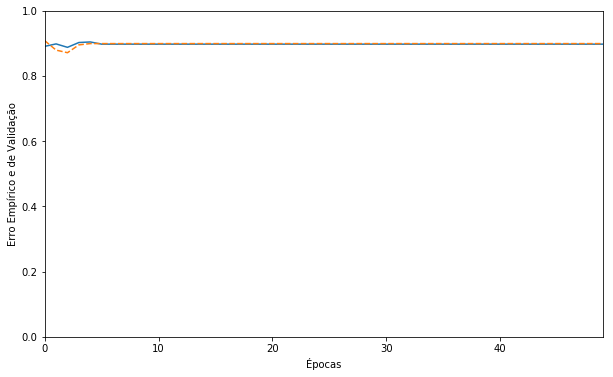

In [18]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 86us/step - loss: 2.4582 - acc: 0.0957 - val_loss: 6.9193 - val_acc: 0.2000
Epoch 2/50
4000/4000 [==============================] - 0s 52us/step - loss: 6.4349 - acc: 0.2142 - val_loss: 10.2986 - val_acc: 0.1010
Epoch 3/50
4000/4000 [==============================] - 0s 57us/step - loss: 10.4945 - acc: 0.1028 - val_loss: 10.1297 - val_acc: 0.1290
Epoch 4/50
4000/4000 [==============================] - 0s 57us/step - loss: 10.4442 - acc: 0.0978 - val_loss: 13.5044 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 0s 59us/step - loss: 13.3138 - acc: 0.0945 - val_loss: 13.0867 - val_acc: 0.1120
Epoch 6/50
4000/4000 [==============================] - 0s 86us/step - loss: 13.0656 - acc: 0.1045 - val_loss: 13.1552 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 0s 62us/step - loss: 13.1208 - acc: 0.0930 - val_loss: 14.2296 - val_acc: 0.1

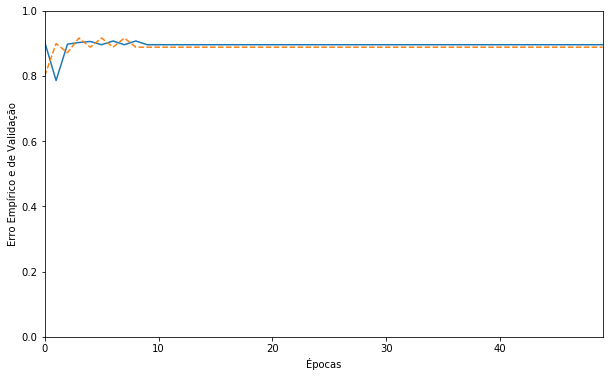

In [8]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 88us/step - loss: 2.5096 - acc: 0.0728 - val_loss: 4.2841 - val_acc: 0.1120
Epoch 2/50
4000/4000 [==============================] - 0s 50us/step - loss: 4.3846 - acc: 0.1045 - val_loss: 5.7912 - val_acc: 0.0820
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 5.8799 - acc: 0.1045 - val_loss: 6.7970 - val_acc: 0.0900
Epoch 4/50
4000/4000 [==============================] - 0s 52us/step - loss: 6.8309 - acc: 0.0925 - val_loss: 6.9445 - val_acc: 0.1210
Epoch 5/50
4000/4000 [==============================] - 0s 53us/step - loss: 7.2618 - acc: 0.1125 - val_loss: 7.8818 - val_acc: 0.0920
Epoch 6/50
4000/4000 [==============================] - 0s 54us/step - loss: 8.0277 - acc: 0.1020 - val_loss: 8.7696 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 0s 56us/step - loss: 8.9633 - acc: 0.0945 - val_loss: 9.1470 - val_acc: 0.1050
Epoch 8

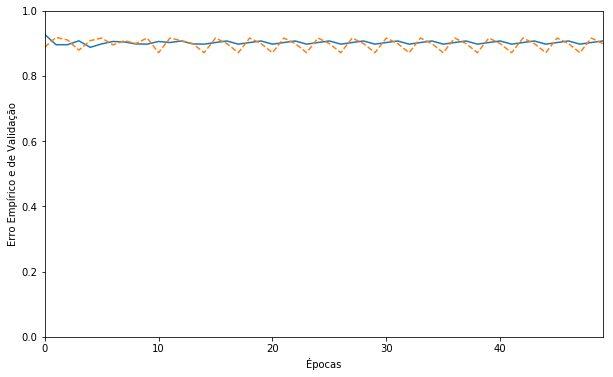

In [10]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 288us/step - loss: 14.4566 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 1s 249us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 1s 258us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 1s 247us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 1s 270us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 1s 283us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 1s 247us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - va

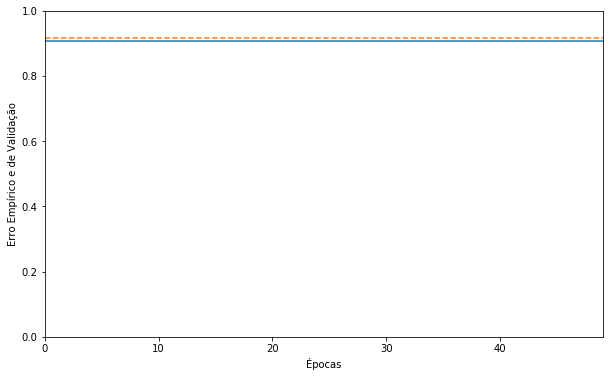

In [11]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=10))
plt.show()

In [12]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=10))
plt.show()

0 = loss: 80.19544 accuracy: 0.08
10 = loss: 51.015587 accuracy: 0.12
20 = loss: 39.41071 accuracy: 0.18
30 = loss: 47.796574 accuracy: 0.22
40 = loss: 43.19472 accuracy: 0.14
50 = loss: 72.58309 accuracy: 0.08
60 = loss: 60.054394 accuracy: 0.12
70 = loss: 54.236298 accuracy: 0.04
80 = loss: 63.10435 accuracy: 0.18
90 = loss: 59.804955 accuracy: 0.1


In [13]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=10))
plt.show()

0 = loss: 39.86313 accuracy: 0.08
10 = loss: 28.901056 accuracy: 0.22
20 = loss: 25.459732 accuracy: 0.12
30 = loss: 32.071754 accuracy: 0.12
40 = loss: 26.979805 accuracy: 0.08
50 = loss: 18.6062 accuracy: 0.04
60 = loss: 15.7359085 accuracy: 0.1
70 = loss: 42.08707 accuracy: 0.08
80 = loss: 19.872309 accuracy: 0.08
90 = loss: 24.908298 accuracy: 0.08


In [14]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=10))
plt.show()

0 = loss: 112.25073 accuracy: 0.12
10 = loss: 97.650955 accuracy: 0.16
20 = loss: 170.03871 accuracy: 0.16
30 = loss: 111.06299 accuracy: 0.12
40 = loss: 154.86241 accuracy: 0.12
50 = loss: 171.00916 accuracy: 0.08
60 = loss: 166.23341 accuracy: 0.08
70 = loss: 191.00748 accuracy: 0.16
80 = loss: 155.51079 accuracy: 0.12
90 = loss: 114.70039 accuracy: 0.12


In [15]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=10))
plt.show()

0 = loss: 50.50403 accuracy: 0.12
10 = loss: 76.76504 accuracy: 0.08
20 = loss: 76.983025 accuracy: 0.16
30 = loss: 44.57356 accuracy: 0.12
40 = loss: 54.41353 accuracy: 0.16
50 = loss: 52.96219 accuracy: 0.12
60 = loss: 63.271732 accuracy: 0.12
70 = loss: 57.632046 accuracy: 0.16
80 = loss: 44.709156 accuracy: 0.12
90 = loss: 47.629974 accuracy: 0.12


In [16]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=10))
plt.show()

0 = loss: 19.38664 accuracy: 0.12
10 = loss: 29.108715 accuracy: 0.16
20 = loss: 30.990145 accuracy: 0.12
30 = loss: 18.266512 accuracy: 0.12
40 = loss: 25.476562 accuracy: 0.16
50 = loss: 26.03979 accuracy: 0.16
60 = loss: 15.6571 accuracy: 0.12
70 = loss: 35.82229 accuracy: 0.12
80 = loss: 37.447582 accuracy: 0.16
90 = loss: 13.68835 accuracy: 0.12


In [17]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=10))
plt.show()

0 = loss: 193.45107 accuracy: 0.0
10 = loss: 193.45107 accuracy: 0.0
20 = loss: 216.06845 accuracy: 0.0
30 = loss: 225.67352 accuracy: 0.0
40 = loss: 225.83029 accuracy: 0.0
50 = loss: 225.95409 accuracy: 0.0
60 = loss: 225.95409 accuracy: 0.0
70 = loss: 225.95409 accuracy: 0.0
80 = loss: 225.95409 accuracy: 0.0
90 = loss: 225.95409 accuracy: 0.0


In [18]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=10))
plt.show()

0 = loss: 131.60335 accuracy: 0.0
10 = loss: 155.01715 accuracy: 0.0
20 = loss: 155.92593 accuracy: 0.0
30 = loss: 155.95331 accuracy: 0.0
40 = loss: 155.97902 accuracy: 0.0
50 = loss: 156.00323 accuracy: 0.0
60 = loss: 156.02614 accuracy: 0.0
70 = loss: 156.04785 accuracy: 0.0
80 = loss: 156.06848 accuracy: 0.0
90 = loss: 156.08815 accuracy: 0.0


In [19]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=10))
plt.show()

0 = loss: 102.12682 accuracy: 0.0
10 = loss: 122.18825 accuracy: 0.0
20 = loss: 122.18825 accuracy: 0.0
30 = loss: 122.18825 accuracy: 0.0
40 = loss: 122.18825 accuracy: 0.0
50 = loss: 122.18825 accuracy: 0.0
60 = loss: 122.18825 accuracy: 0.0
70 = loss: 122.18825 accuracy: 0.0
80 = loss: 122.18825 accuracy: 0.0
90 = loss: 122.18825 accuracy: 0.0


Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 94us/step - loss: 2.4469 - acc: 0.0897 - val_loss: 3.2366 - val_acc: 0.1130
Epoch 2/50
4000/4000 [==============================] - 0s 56us/step - loss: 3.1244 - acc: 0.1238 - val_loss: 2.7225 - val_acc: 0.2550
Epoch 3/50
4000/4000 [==============================] - 0s 58us/step - loss: 2.7923 - acc: 0.2298 - val_loss: 2.4020 - val_acc: 0.1680
Epoch 4/50
4000/4000 [==============================] - 0s 57us/step - loss: 2.3899 - acc: 0.1670 - val_loss: 1.9494 - val_acc: 0.3520
Epoch 5/50
4000/4000 [==============================] - 0s 55us/step - loss: 1.9355 - acc: 0.3820 - val_loss: 1.6259 - val_acc: 0.5850
Epoch 6/50
4000/4000 [==============================] - 0s 57us/step - loss: 1.6239 - acc: 0.5987 - val_loss: 1.4354 - val_acc: 0.5780
Epoch 7/50
4000/4000 [==============================] - 0s 57us/step - loss: 1.4230 - acc: 0.6030 - val_loss: 1.4153 - val_acc: 0.6080
Epoch 8

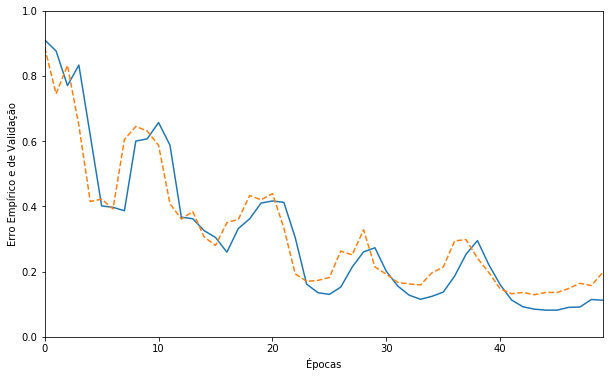

In [10]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 96us/step - loss: 2.3398 - acc: 0.1460 - val_loss: 2.1383 - val_acc: 0.1140
Epoch 2/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.1101 - acc: 0.1233 - val_loss: 2.4306 - val_acc: 0.3490
Epoch 3/50
4000/4000 [==============================] - 0s 58us/step - loss: 2.4590 - acc: 0.3555 - val_loss: 2.2408 - val_acc: 0.2400
Epoch 4/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.2702 - acc: 0.2450 - val_loss: 1.9420 - val_acc: 0.3010
Epoch 5/50
4000/4000 [==============================] - 0s 53us/step - loss: 1.9417 - acc: 0.3117 - val_loss: 1.6211 - val_acc: 0.6190
Epoch 6/50
4000/4000 [==============================] - 0s 56us/step - loss: 1.6005 - acc: 0.6492 - val_loss: 1.4511 - val_acc: 0.5330
Epoch 7/50
4000/4000 [==============================] - 0s 52us/step - loss: 1.4459 - acc: 0.5447 - val_loss: 1.6573 - val_acc: 0.5050
Epoch 8

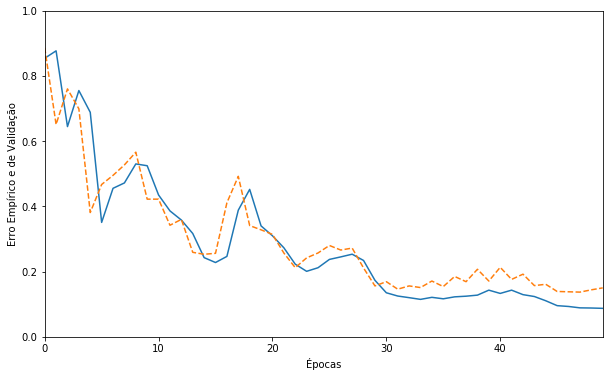

In [11]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 98us/step - loss: 2.4547 - acc: 0.0903 - val_loss: 2.4061 - val_acc: 0.1390
Epoch 2/50
4000/4000 [==============================] - 0s 52us/step - loss: 2.4014 - acc: 0.1343 - val_loss: 2.1322 - val_acc: 0.2560
Epoch 3/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.1309 - acc: 0.2585 - val_loss: 1.9795 - val_acc: 0.3370
Epoch 4/50
4000/4000 [==============================] - 0s 54us/step - loss: 1.9773 - acc: 0.3160 - val_loss: 1.9715 - val_acc: 0.3530
Epoch 5/50
4000/4000 [==============================] - 0s 55us/step - loss: 1.9813 - acc: 0.3203 - val_loss: 1.9894 - val_acc: 0.3120
Epoch 6/50
4000/4000 [==============================] - 0s 55us/step - loss: 1.9613 - acc: 0.3275 - val_loss: 1.7556 - val_acc: 0.4340
Epoch 7/50
4000/4000 [==============================] - 0s 61us/step - loss: 1.7654 - acc: 0.4235 - val_loss: 1.6792 - val_acc: 0.5420
Epoch 8

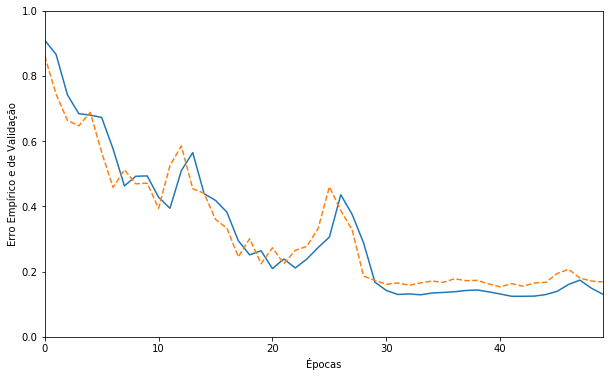

In [12]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=1))
plt.show()

In [23]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=1))
plt.show()

0 = loss: 1.8207386 accuracy: 0.48
10 = loss: 2.2679791 accuracy: 0.28
20 = loss: 1.9061888 accuracy: 0.4
30 = loss: 2.7039878 accuracy: 0.5
40 = loss: 2.5018978 accuracy: 0.3
50 = loss: 2.6616898 accuracy: 0.26
60 = loss: 2.5107462 accuracy: 0.26
70 = loss: 2.5334198 accuracy: 0.36
80 = loss: 2.3277478 accuracy: 0.36
90 = loss: 2.132747 accuracy: 0.3


In [24]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=1))
plt.show()

0 = loss: 2.1943712 accuracy: 0.22
10 = loss: 2.875095 accuracy: 0.1
20 = loss: 2.6619177 accuracy: 0.22
30 = loss: 3.1388614 accuracy: 0.14
40 = loss: 3.2414048 accuracy: 0.16
50 = loss: 2.321914 accuracy: 0.24
60 = loss: 2.3933265 accuracy: 0.24
70 = loss: 2.8015728 accuracy: 0.16
80 = loss: 2.668131 accuracy: 0.24
90 = loss: 2.5920825 accuracy: 0.24


In [25]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=1))
plt.show()

0 = loss: 2.209177 accuracy: 0.2
10 = loss: 2.3292477 accuracy: 0.22
20 = loss: 2.329328 accuracy: 0.22
30 = loss: 2.3289504 accuracy: 0.22
40 = loss: 2.3245645 accuracy: 0.22
50 = loss: 2.3187482 accuracy: 0.22
60 = loss: 2.3162932 accuracy: 0.22
70 = loss: 2.3152466 accuracy: 0.22
80 = loss: 2.3147097 accuracy: 0.22
90 = loss: 2.314393 accuracy: 0.22


In [26]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=1))
plt.show()

0 = loss: 2.6234744 accuracy: 0.32
10 = loss: 8.466247 accuracy: 0.2
20 = loss: 7.186866 accuracy: 0.16
30 = loss: 3.835947 accuracy: 0.16
40 = loss: 6.107141 accuracy: 0.16
50 = loss: 9.905339 accuracy: 0.2
60 = loss: 9.923687 accuracy: 0.2
70 = loss: 11.797567 accuracy: 0.2
80 = loss: 9.673529 accuracy: 0.2
90 = loss: 7.5753508 accuracy: 0.2


In [27]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=1))
plt.show()

0 = loss: 2.307139 accuracy: 0.2
10 = loss: 2.4223511 accuracy: 0.12
20 = loss: 2.495226 accuracy: 0.12
30 = loss: 2.4976053 accuracy: 0.12
40 = loss: 2.4973907 accuracy: 0.12
50 = loss: 2.4966378 accuracy: 0.12
60 = loss: 2.4958906 accuracy: 0.12
70 = loss: 2.4952607 accuracy: 0.12
80 = loss: 2.4947605 accuracy: 0.12
90 = loss: 2.4943726 accuracy: 0.12


In [28]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=1))
plt.show()

0 = loss: 2.3853724 accuracy: 0.16
10 = loss: 2.3054247 accuracy: 0.2
20 = loss: 2.2900925 accuracy: 0.2
30 = loss: 2.2849288 accuracy: 0.2
40 = loss: 2.2826433 accuracy: 0.2
50 = loss: 2.281351 accuracy: 0.2
60 = loss: 2.2805133 accuracy: 0.2
70 = loss: 2.2799332 accuracy: 0.2
80 = loss: 2.3074872 accuracy: 0.2
90 = loss: 2.307221 accuracy: 0.2


In [ ]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 35s 9ms/step - loss: 14.6197 - acc: 0.0927 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 31s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 31s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 30s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 31s 8ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 

In [ ]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=1))
plt.show()

In [ ]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 86us/step - loss: 2.5223 - acc: 0.1015 - val_loss: 2.5567 - val_acc: 0.1880
Epoch 2/50
4000/4000 [==============================] - 0s 55us/step - loss: 2.4851 - acc: 0.1852 - val_loss: 2.3405 - val_acc: 0.2430
Epoch 3/50
4000/4000 [==============================] - 0s 55us/step - loss: 2.3121 - acc: 0.2498 - val_loss: 2.2136 - val_acc: 0.3010
Epoch 4/50
4000/4000 [==============================] - 0s 56us/step - loss: 2.1929 - acc: 0.3262 - val_loss: 1.8023 - val_acc: 0.4670
Epoch 5/50
4000/4000 [==============================] - 0s 56us/step - loss: 1.7850 - acc: 0.4723 - val_loss: 1.6903 - val_acc: 0.5470
Epoch 6/50
4000/4000 [==============================] - 0s 62us/step - loss: 1.6819 - acc: 0.5680 - val_loss: 1.6104 - val_acc: 0.5420
Epoch 7/50
4000/4000 [==============================] - 0s 56us/step - loss: 1.5616 - acc: 0.5740 - val_loss: 1.6051 - val_acc: 0.5270
Epoch 8

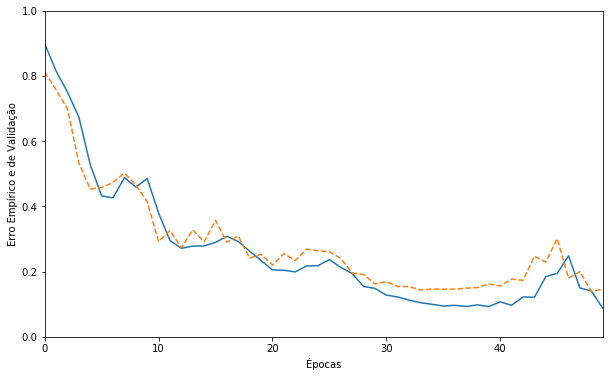

In [7]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 97us/step - loss: 2.4582 - acc: 0.0957 - val_loss: 2.2642 - val_acc: 0.2230
Epoch 2/50
4000/4000 [==============================] - 0s 61us/step - loss: 2.2397 - acc: 0.2192 - val_loss: 1.9890 - val_acc: 0.4080
Epoch 3/50
4000/4000 [==============================] - 0s 59us/step - loss: 1.9740 - acc: 0.4212 - val_loss: 1.8144 - val_acc: 0.4820
Epoch 4/50
4000/4000 [==============================] - 0s 60us/step - loss: 1.8020 - acc: 0.5203 - val_loss: 1.7069 - val_acc: 0.5790
Epoch 5/50
4000/4000 [==============================] - 0s 59us/step - loss: 1.6952 - acc: 0.5815 - val_loss: 1.6806 - val_acc: 0.4590
Epoch 6/50
4000/4000 [==============================] - 0s 60us/step - loss: 1.6637 - acc: 0.4712 - val_loss: 1.7874 - val_acc: 0.4380
Epoch 7/50
4000/4000 [==============================] - 0s 60us/step - loss: 1.7568 - acc: 0.4415 - val_loss: 1.6269 - val_acc: 0.5570
Epoch 8

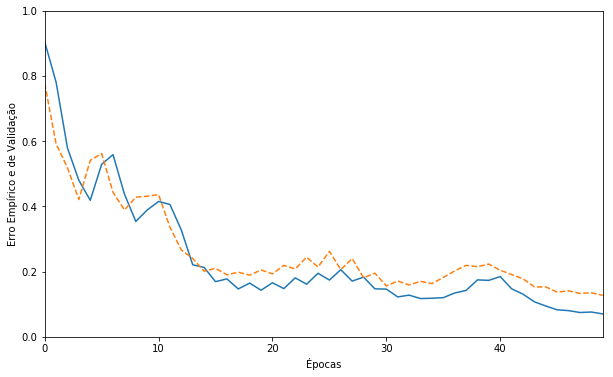

In [8]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 89us/step - loss: 2.5096 - acc: 0.0728 - val_loss: 2.2212 - val_acc: 0.1640
Epoch 2/50
4000/4000 [==============================] - 0s 52us/step - loss: 2.2315 - acc: 0.1708 - val_loss: 2.0481 - val_acc: 0.4210
Epoch 3/50
4000/4000 [==============================] - 0s 59us/step - loss: 2.0445 - acc: 0.4295 - val_loss: 1.9471 - val_acc: 0.3940
Epoch 4/50
4000/4000 [==============================] - 0s 59us/step - loss: 1.9199 - acc: 0.4453 - val_loss: 1.8836 - val_acc: 0.4680
Epoch 5/50
4000/4000 [==============================] - 0s 58us/step - loss: 1.8792 - acc: 0.4915 - val_loss: 1.9112 - val_acc: 0.2800
Epoch 6/50
4000/4000 [==============================] - 0s 60us/step - loss: 1.8685 - acc: 0.3142 - val_loss: 1.9012 - val_acc: 0.5070
Epoch 7/50
4000/4000 [==============================] - 0s 58us/step - loss: 1.9133 - acc: 0.5135 - val_loss: 1.6822 - val_acc: 0.5890
Epoch 8

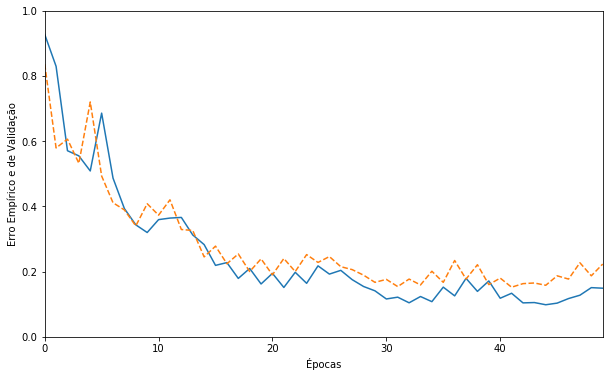

In [9]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=0.5))
plt.show()

In [26]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=0.5))
plt.show()

0 - loss: 1.5127835 accuracy: 0.44 cross-validation: 0.532
20 - loss: 1.4758474 accuracy: 0.56 cross-validation: 0.482
40 - loss: 2.5696824 accuracy: 0.36 cross-validation: 0.44
60 - loss: 1.9682355 accuracy: 0.34 cross-validation: 0.418
80 - loss: 1.8300679 accuracy: 0.36 cross-validation: 0.444
100 - loss: 1.6396523 accuracy: 0.44 cross-validation: 0.412
Done!
[0.5600000023841858, 0.5399999916553497, 0.4599999785423279, 0.5999999940395355, 0.6399999856948853, 0.5800000131130219, 0.5200000107288361, 0.5999999940395355, 0.5399999916553497, 0.699999988079071, 0.4599999785423279, 0.7199999988079071, 0.5, 0.5, 0.5999999940395355, 0.4599999785423279, 0.4599999785423279, 0.5, 0.4599999785423279, 0.42000001668930054, 0.4399999976158142, 0.760000005364418, 0.760000005364418, 0.5399999916553497, 0.6399999856948853, 0.5, 0.5800000131130219, 0.48000001907348633, 0.5200000107288361, 0.6200000047683716, 0.6599999964237213, 0.5200000107288361, 0.5600000023841858, 0.7400000095367432, 0.6399999856948

In [36]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=0.5))
plt.show()

0 = loss: 1.6024116 accuracy: 0.52
10 = loss: 1.3845537 accuracy: 0.64
20 = loss: 1.5222553 accuracy: 0.52
30 = loss: 1.9743713 accuracy: 0.24
40 = loss: 1.8259895 accuracy: 0.38
50 = loss: 1.762256 accuracy: 0.34
60 = loss: 1.741746 accuracy: 0.28
70 = loss: 1.6898047 accuracy: 0.3
80 = loss: 1.6397237 accuracy: 0.32
90 = loss: 1.6387763 accuracy: 0.32


In [37]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=0.5))
plt.show()

0 = loss: 2.155029 accuracy: 0.2
10 = loss: 1.5261333 accuracy: 0.52
20 = loss: 1.6038461 accuracy: 0.48
30 = loss: 1.4505213 accuracy: 0.4
40 = loss: 1.4176757 accuracy: 0.42
50 = loss: 1.4117393 accuracy: 0.44
60 = loss: 1.5802459 accuracy: 0.3
70 = loss: 1.5865233 accuracy: 0.3
80 = loss: 1.5868245 accuracy: 0.3
90 = loss: 1.5852846 accuracy: 0.3


In [38]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=0.5))
plt.show()

0 = loss: 1.4941926 accuracy: 0.48
10 = loss: 2.9690182 accuracy: 0.16
20 = loss: 3.3696604 accuracy: 0.16
30 = loss: 3.366854 accuracy: 0.16
40 = loss: 3.2170563 accuracy: 0.16
50 = loss: 3.3893545 accuracy: 0.16
60 = loss: 3.4921253 accuracy: 0.16
70 = loss: 3.132991 accuracy: 0.16
80 = loss: 3.1392288 accuracy: 0.16
90 = loss: 3.253384 accuracy: 0.16


In [39]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=0.5))
plt.show()

0 = loss: 1.7245071 accuracy: 0.4
10 = loss: 1.91868 accuracy: 0.32
20 = loss: 2.0431113 accuracy: 0.28
30 = loss: 2.0386534 accuracy: 0.28
40 = loss: 2.0355012 accuracy: 0.28
50 = loss: 2.0327957 accuracy: 0.28
60 = loss: 2.03026 accuracy: 0.28
70 = loss: 2.0278993 accuracy: 0.28
80 = loss: 2.0256722 accuracy: 0.28
90 = loss: 1.9322946 accuracy: 0.32


In [40]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=0.5))
plt.show()

0 = loss: 1.9693809 accuracy: 0.2
10 = loss: 2.035692 accuracy: 0.28
20 = loss: 2.072323 accuracy: 0.28
30 = loss: 2.0727522 accuracy: 0.28
40 = loss: 2.0731254 accuracy: 0.28
50 = loss: 2.0733607 accuracy: 0.28
60 = loss: 2.073493 accuracy: 0.28
70 = loss: 2.0787556 accuracy: 0.28
80 = loss: 2.0787308 accuracy: 0.28
90 = loss: 2.0787141 accuracy: 0.28


In [41]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=0.5))
plt.show()

0 = loss: 21.763538 accuracy: 0.0
10 = loss: 28.63059 accuracy: 0.0
20 = loss: 28.107618 accuracy: 0.0
30 = loss: 28.016129 accuracy: 0.0
40 = loss: 37.45553 accuracy: 0.0
50 = loss: 11.9814005 accuracy: 0.0
60 = loss: 10.101574 accuracy: 0.0
70 = loss: 23.418238 accuracy: 0.0
80 = loss: 31.497787 accuracy: 0.0
90 = loss: 21.041428 accuracy: 0.0


In [42]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=0.5))
plt.show()

0 = loss: 10.28965 accuracy: 0.0
10 = loss: 9.480356 accuracy: 0.0
20 = loss: 9.480136 accuracy: 0.0
30 = loss: 9.47994 accuracy: 0.0
40 = loss: 9.479799 accuracy: 0.0
50 = loss: 9.4797 accuracy: 0.0
60 = loss: 9.479632 accuracy: 0.0
70 = loss: 9.479577 accuracy: 0.0
80 = loss: 9.479534 accuracy: 0.0
90 = loss: 9.479502 accuracy: 0.0


In [43]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=0.5))
plt.show()

0 = loss: 5.5774627 accuracy: 0.0
10 = loss: 5.577077 accuracy: 0.0
20 = loss: 5.5770764 accuracy: 0.0
30 = loss: 5.5770764 accuracy: 0.0
40 = loss: 5.5770774 accuracy: 0.0
50 = loss: 5.577077 accuracy: 0.0
60 = loss: 5.577076 accuracy: 0.0
70 = loss: 5.577078 accuracy: 0.0
80 = loss: 5.5770764 accuracy: 0.0
90 = loss: 5.577077 accuracy: 0.0
